## Logistic Regression: Classification Problem

## Data Gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/iris.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# check for missing data
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# check for duplicated rows
df.duplicated().sum()

np.int64(1)

In [9]:
df = df.drop_duplicates()

## Separate X and Y features

Y : Species 
X : all remaining features, sepal length/width, petal length/width

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Data Preprocessing and Data Cleaning

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Train Test Split
rate at which you can divide:

100%

60 % training 40% testing

70% training 30% testing

80% training 20% testing

In [17]:
from sklearn.model_selection import train_test_split

random_state = this is generally used for reproducing model results

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)

In [19]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
36,-0.414976,1.012401,-1.390014,-1.308624
37,-1.139562,1.242352,-1.333255,-1.440192
13,-1.864149,-0.137353,-1.503531,-1.440192
68,0.430375,-1.976960,0.426261,0.401770
11,-1.260327,0.782450,-1.219738,-1.308624


In [20]:
xtrain.index

Index([ 36,  37,  13,  68,  11,  52,  49,  65, 117,  55,
       ...
       122,  61, 110,  72,  98, 120, 112,  48,   4,  56],
      dtype='int64', length=104)

In [21]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [22]:
ytrain.head()

,species
36,setosa
37,setosa
13,setosa
68,versicolor
11,setosa


In [23]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


## Build the model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
ypred_train = model.predict(xtrain)

In [28]:
yprob_train = model.predict_proba(xtrain)

In [29]:
yprob_train[0]

array([9.67343450e-01, 3.26556334e-02, 9.16479348e-07])

In [30]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
ypred_train[:5]

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)

In [32]:
ytrain.head()

,species
36,setosa
37,setosa
13,setosa
68,versicolor
11,setosa


## Model Evaluation

In [33]:
model.score(xtrain,ytrain)

0.9711538461538461

In [34]:
model.score(xtest,ytest)

0.9111111111111111

## Confusion Matrix

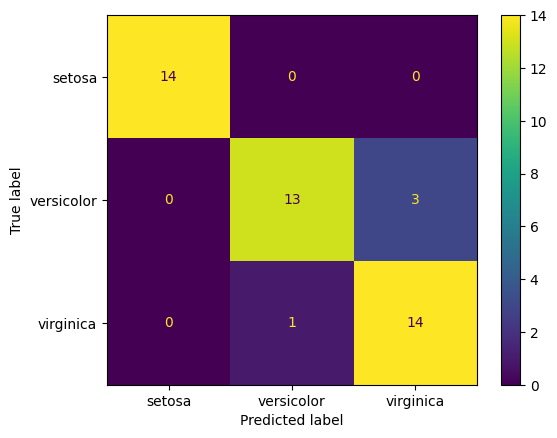

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

## Classification Report

In [36]:
ypred_test = model.predict(xtest)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.81      0.87        16
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



In [38]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred_test,average='macro')

0.9138888888888889

## All the scores are greater than 80%(0.80), we can consider this model for final model building

In [39]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/iris_sample.csv"
xnew = pd.read_csv(path2)
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [40]:
xnew.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

## Preprocess and clean your out of sample data

In [41]:
model.predict(xnew)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [42]:
pre

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [43]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477


## Final Predictions

In [44]:
species_predicted = model.predict(xnew_pre)

In [45]:
species_predicted

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [46]:
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [47]:
xnew['predicted_species'] = species_predicted

In [48]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,predicted_species
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


In [49]:
xnew.to_csv("Iris Species Predicted.csv",index=False)